<a href="https://colab.research.google.com/github/M339KUMAR/ColabDemoFiles/blob/main/GCAF/Global_precip_2018_netCDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Global Precipitation Data  netCDF file Format

##Importing Libraries

In [ ]:
!pip install netCDF4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.8 MB/s eta 0:00:00


In [ ]:
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.1 MB/s eta 0:00:00


In [ ]:
!pip install regionmask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 37.9 MB/s eta 0:00:00


In [ ]:
!pip install Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.0/936.0 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import Matplotlib.dates ad mdates
import matplotlib.gridspec as gridspec
from matplotlib.colorbar import Colorbar
from datetime import datetime
from netCDF4 import Dataset as ds
from scipy import interpolate as ip
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.animation as anim
from shapely.geometry import Point, shape, Polygon
import geopandas as gpd
import regionmask

from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [ ]:


cwd= os.getcwd()
print(cwd)

/content


In [ ]:


gpds= xr.open_dataset("/content/sample_data/precip.mon.ltm.v2018.nc")

/usr/local/lib/python3.10/dist-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.10/dist-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()


In [ ]:
gpds

<xarray.Dataset>
Dimensions:             (lat: 360, lon: 720, time: 12, nbnds: 2)
Coordinates:
  * lat                 (lat) float32 89.75 89.25 88.75 ... -88.75 -89.25 -89.75
  * lon                 (lon) float32 0.25 0.75 1.25 1.75 ... 358.8 359.2 359.8
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:0...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...
Attributes:
    Original_Source:                http://www.dwd.de/en/FundE/Klima/KLIS/int...
    Reference:                      Users of the data sets are kindly request...
    original_source:                ftp://ftp-anon.dwd.de/pub/data/gpcc/html/...
    Conventions:                    CF 1.0
    dataset_title:                  Global Precipitation Climatology Centre (...
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    title:                          GPCC Full Data Reanalysis Version 2018 0....
    history:                        Created 2019/03/12 by doMonthLTM
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    data_modified:                  2019-03-12

In [ ]:
gpds.data_vars

Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] ...
    precip              (time, lat, lon) float32 ...
    valid_yr_count      (time, lat, lon) float32 ...

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


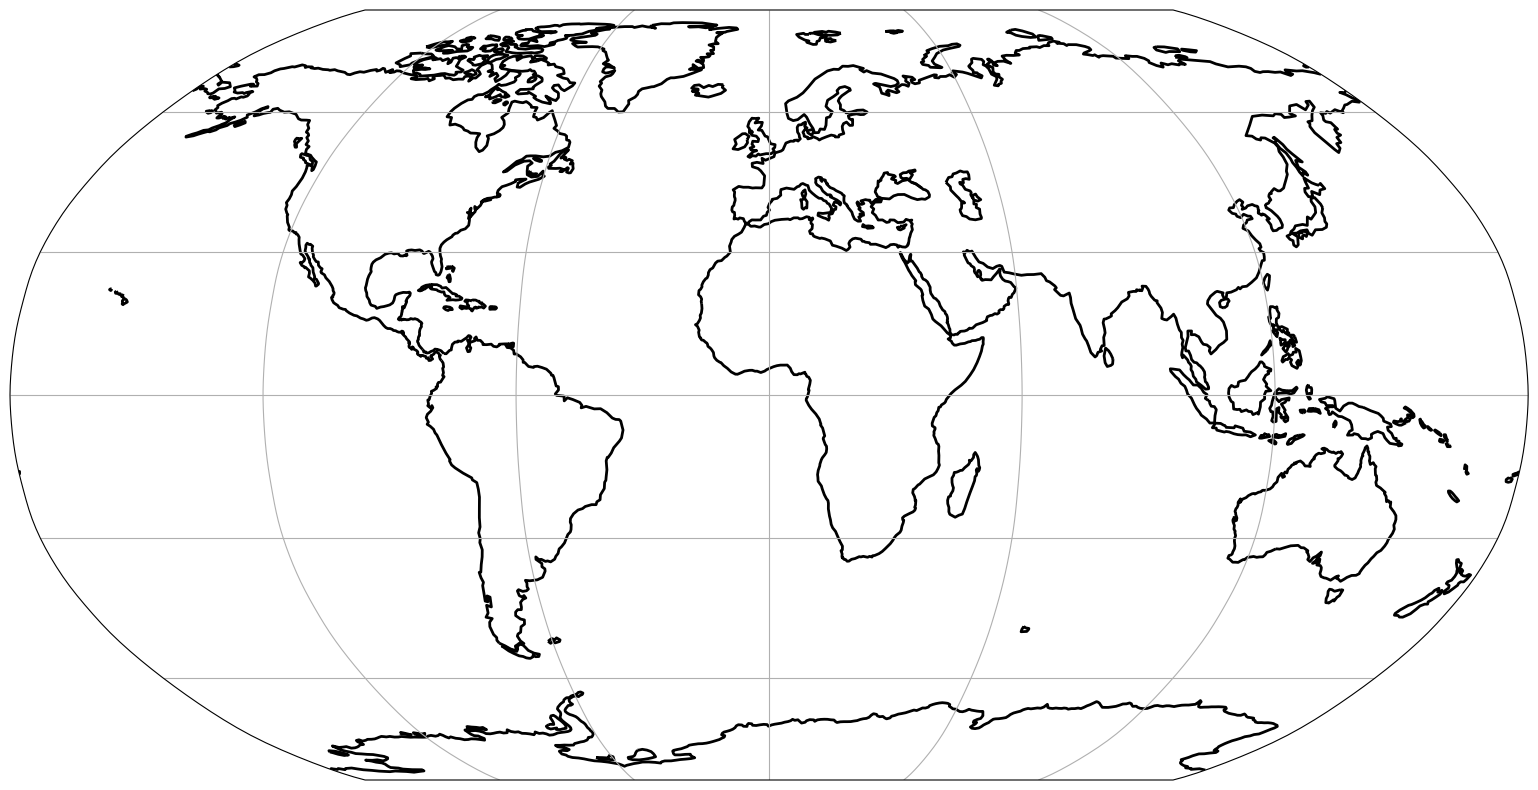

In [ ]:
fig= plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(linewidth=2.0)
ax.gridlines()
#gpds.precip[6].plot(ax=ax,
                               #transform= ccrs.Robinson(),
                               #cbar_kwargs=['shrink',0.7],
                               #robust = True)
#gpds.precip[0].plot()

In [ ]:
gpds.dims

Frozen({'lat': 360, 'lon': 720, 'time': 12, 'nbnds': 2})

In [ ]:
gpds.attrs

{'Original_Source': 'http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm\n is the webpage and the data is at ftp://ftp.dwd.de/pub/data/gpcc/download.html',
 'Reference': 'Users of the data sets are kindly requested to give feed back and to refer to GPCC publications on this webpage: http://www.dwd.de/bvbw/appmanager/bvbw/dwdwwwDesktop/?_nfpb=true&_pageLabel=_dwdwww_klima_umwelt_datenzentren_wzn&T12404518261141645246564gsbDocumentPath=Content%2FOeffentlichkeit%2FKU%2FKU4%2FKU42%2Fteaser__product__access.html&_state=maximized&_windowLabel=T12404518261141645246564&lastPageLabel=_dwdwww_klima_umwelt_datenzentren_wzn',
 'original_source': 'ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_download.html',
 'Conventions': 'CF 1.0',
 'dataset_title': 'Global Precipitation Climatology Centre (GPCC)',
 'References': 'https://www.psl.noaa.gov/data/gridded/data.gpcc.html',
 'title': 'GPCC Full Data Reanalysis Version 2018 0.5x0.5 Monthly Total',
 'history': 'Created 2019/03/12 by doMonthLTM',


In [ ]:
gpds.precip

<xarray.DataArray 'precip' (time: 12, lat: 360, lon: 720)>
[3110400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]

In [ ]:
gpds.lon

<xarray.DataArray 'lon' (lon: 720)>
array([2.5000e-01, 7.5000e-01, 1.2500e+00, ..., 3.5875e+02, 3.5925e+02,
       3.5975e+02], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
Attributes:
    long_name:           Longitude
    units:               degrees_east
    standard_name:       longitude
    actual_range:        [2.5000e-01 3.5975e+02]
    axis:                X
    coordinate_defines:  point

In [ ]:
gpds.lat

<xarray.DataArray 'lat' (lat: 360)>
array([ 89.75,  89.25,  88.75, ..., -88.75, -89.25, -89.75], dtype=float32)
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Attributes:
    long_name:           Latitude
    units:               degrees_north
    standard_name:       latitude
    axis:                Y
    coordinate_defines:  point
    actual_range:        [ 89.75 -89.75]

In [ ]:
gpds.time

<xarray.DataArray 'time' (time: 12)>
array([cftime.DatetimeGregorian(1, 1, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 2, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 3, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 4, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 5, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 6, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 7, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 8, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 9, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 10, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 11, 1, 0, 0, 0, 0, has_year_zero=False),
       cftime.DatetimeGregorian(1, 12, 1, 0, 0, 0, 0, has_year_zero=False)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes:
    long_name:                 Time
    delta_t:                   0000-01-00 00:00:00
    avg_period:                0030-00-00 00:00:00
    prev_avg_period:           0000-01-00 00:00:00
    standard_name:             time
    axis:                      T
    coordinate_defines:        start
    actual_range:              [-657073. -656739.]
    climatology:               climatology_bounds
    climo_period:              1981/01/01 - 2010/12/31
    ltm_range:                 [66109. 77035.]
    interpreted_actual_range:  0001/01/01 00:00:00 - 0001/12/01 00:00:00

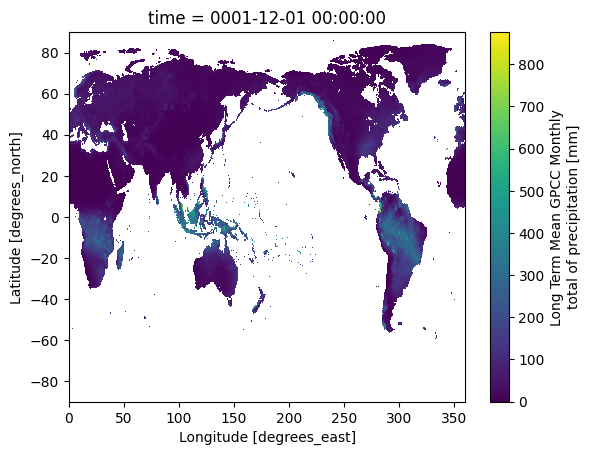

In [ ]:
gpds.precip[11].plot()

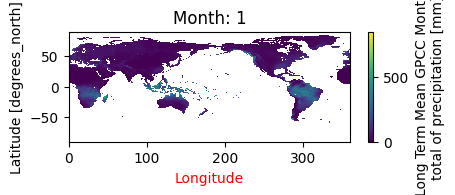

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-01-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


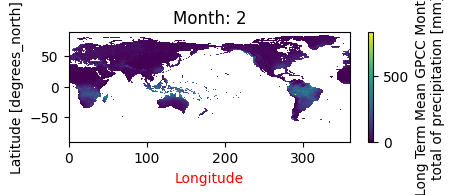

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-02-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


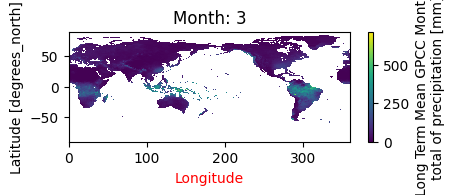

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-03-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


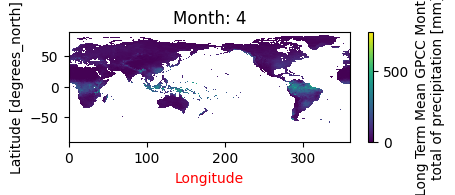

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-04-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


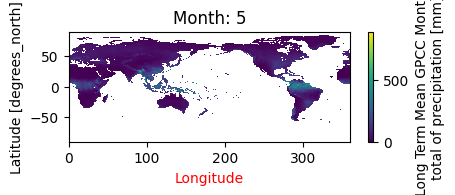

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-05-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


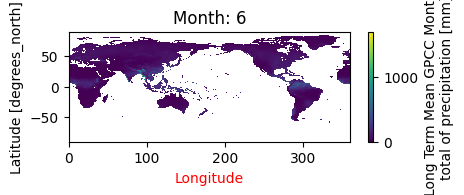

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-06-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


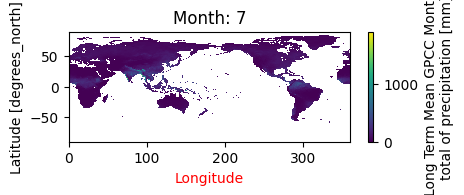

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-07-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


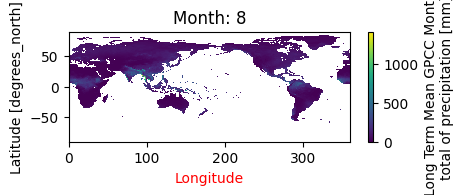

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-08-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


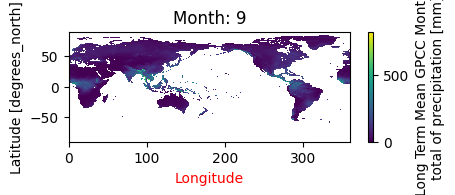

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-09-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


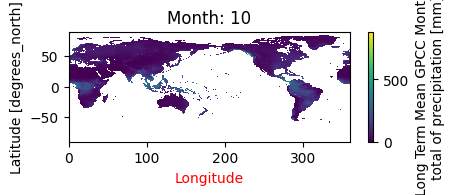

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-10-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


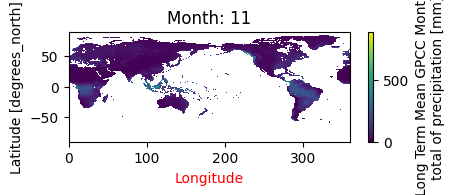

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-11-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


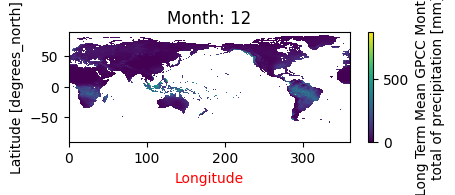

<xarray.DataArray 'precip' (lat: 360, lon: 720)>
[259200 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * lon      (lon) float32 0.25 0.75 1.25 1.75 2.25 ... 358.2 358.8 359.2 359.8
    time     object 0001-12-01 00:00:00
Attributes:
    units:         mm
    var_desc:      Precipitation
    level_desc:    Surface
    long_name:     Long Term Mean GPCC Monthly total of precipitation
    valid_range:   [   0. 8000.]
    statistic:     Long Term Mean
    parent_stat:   Total
    level:         Surface
    dataset:       GPCC Precipitation 0.5degree V2018 Full Reanalysis
    actual_range:  [   0.     1906.8398]
**************************************************


In [ ]:
#fig, ax= plt.subplots(6,2, figsize=(10,10))
for idx, i in enumerate(gpds.precip):
      # print(idx)
      plt.figure(figsize=(10,10))
      plt.subplot(6,2,idx+1)
      #plt.plot(gpds.precip[idx])
      gpds.precip[idx].plot()
      plt.title('Month: '+str(idx+1))
      plt.xlabel("Longitude", color='red')
      #plt.ylabel("Precip [mm]", color='red')
      #plt.colorbar()
      plt.show()
      print(i)
      print('*'*50)

In [ ]:
gpds.nbnds[1]

<xarray.DataArray 'nbnds' ()>
array(1)